# ???

Not sure about what am I doing in this notebook

In [ ]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh
import parametric_fz as fzpar
import parametric_PeHeat as PeHpar

import MCMCFit as mcmc

%matplotlib inline

microntocm    = 1.0e-4
cmtomicron    = 1.0e4
AAtocm        = 1.0e-8
cmtoAA        = 1.0e8
microntoAA    = 1.0e4
AAtomicron    = 1.0e-4
ergtoeV       = 6.242e11
eVtoerg       = 1.602e-12

hplanck       = 4.135667662e-15 # eV s
clight        = 2.99792458e10   # cm s-1

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

import time

%matplotlib inline


grain_type = "silicate"
pcent      = 1

########################################################################################

grain_size = 3

save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju/Old_BeforeSept2018"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_00%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs3 = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain


In [8]:
Gtot = cdist["G"]+cdist["G_CR"]
temp = cdist["temp"]
ne   = cdist["new_ne"]
ntot = cdist["nH"]

In [17]:
Heat_IM18 = np.zeros_like(ntot, dtype=np.float)
#for i in range(len(ntot)):
for i in range(5000):
    Heat_IM18[i] = ntot[i]* PeHpar.get_Gamma_tot(Gtot[i], temp[i], ne[i])

/Users/juan/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


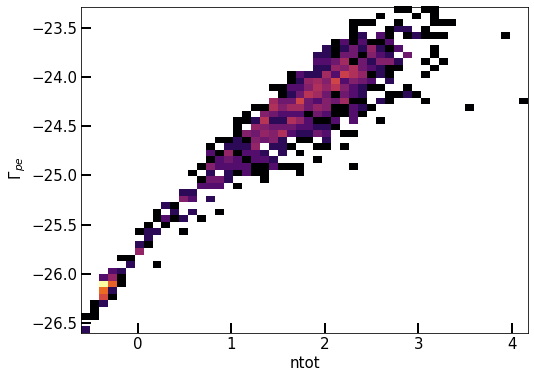

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist2d(np.log10(ntot[0:999]),np.log10(Heat_IM18[0:999]), bins=50, norm=LogNorm(), cmap="inferno", normed=True)

ax.set_xlabel("ntot", fontsize=15)
ax.set_ylabel(" $\Gamma_{pe, total}$", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_title("100 $\AA$", fontsize=15)

fig.show()